In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover
import math
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

ibmqfactory.load_account:WARNING:2023-03-08 14:50:25,930: Credentials are already in use. The existing account in the session will be replaced.


Libraries Imported Successfully!


{'100': 1024}


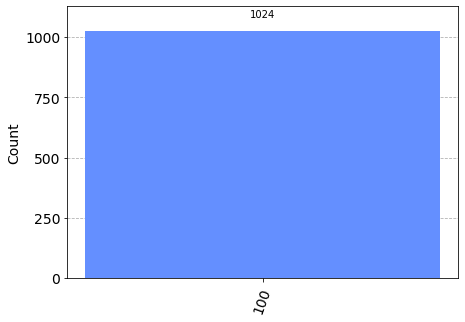

In [168]:
from qiskit import QuantumCircuit, Aer, execute

# Define the decimal numbers to be converted to binary
number_1 = 1
number_2 = 5

# Determine the number of qubits required
n = max(len(bin(number_1)), len(bin(number_2)))-2

cr = ClassicalRegister(n, 'c') # create a classical register to store the result of the comparison
qr1 = QuantumRegister(n, 'q1') # create a quantum register for the first integer
qr2 = QuantumRegister(n, 'q2') # create a quantum register for the second integer
qr_diff = QuantumRegister(n, 'diff') # create a quantum register for the difference
qr_results = QuantumRegister(1, 'results')
qc = QuantumCircuit(qr1,qr2,qr_diff,qr_results,cr)# Create a quantum circuit with n qubits and n classical bits

# Apply X gates to the qubits corresponding to 1s in the binary representation of the decimal number
binary = bin(number_1)[2:].zfill(n)
binary2 = bin(number_2)[2:].zfill(n)



for i in range(n):
    if binary[-(i+1)] == '1':
        qc.x(qr1[i])
    if binary2[-(i+1)] == '1':
        qc.x(qr2[i])


# Compute the difference using the two's complement method
for i in range(n):
    qc.cx(qr1[i], qr_diff[i])
    qc.cx(qr2[i], qr_diff[i])
    
for i in range(n):
    qc.measure(qr_diff[i], cr[i])

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)


    # Run the circuit on the qasm simulator and print the result
    # backend = Aer.get_backend('qasm_simulator')
    # result = execute(qc, backend).result()
    # counts = result.get_counts(qc)
    # binary = max(counts, key=counts.get)
    # print(f"Decimal {decimal} is represented in binary as {binary}.")
    
    """
    Notes: 
        I have struggled to complete the task, so I'll describe what I have tried and how I think about this problem. 
        I was interested in data and statistical analysis, so Task 1 looks interesting. 
        From my analysis, I found that based on finding which number is bigger, 
        I have to think about the smallest number in the computer language, binary numbers. 
        So I start searching about how binary numbers work and how adding and subtracting will cause the result to be binary numbers. 
        I found a couple of assumptions in my mind and started testing only using python. 
        I gained a lot of knowledge about binary, and I started to search for what kind of algorithms might help to compare two numbers. 
        First, I could use Oracle and Grover's Operation to reduce or increase the height of the amplitude so I could find which binary is bigger. 
        I also tried to use the Bit Shifts, which will help to compare two binary numbers. 
        I also tried to create my algorithms from scratch to be more flexible, but It didn't work well. 
        The hope that I was thinking is that by comparing the two numbers' differences, 
        using the x and cx gate and registering on the auxiliary qubit, I could solve it as a True and False statement. 
        Which may help to detect whether the first element is larger or not. It worked, but It won't work after it gets larger numbers. 
        While searching algorithms and thinking graphically, I thought I could use Quantum Phase Estimation, which is out of my knowledge. 
        I'm unhappy I couldn't figure it out but I did my best. If you could, I want the answer for this task to be completed. 
        
        Thanks!!
    """
    